# Logistic Regression

Logistic Regression 은 이름은 Regression 이지만, Label의 확률을 예측 하기때문에 Binary Classfication 문제의 선형 모델로 쓰입니다.

LogisticRegression는 Binary Classification을 수행하지만, One vs the Rest 또는 Multinomial 방식을 통해 Multi Classification 도 지원합니다.

**One vs the Rest**

각 Class 와 나머지를 구분하는 Logistic Regression Classifier 여러 개를 만들어 Multi Class Classification 수행 

![One vs Rest](https://wikidocs.net/images/page/4291/logreg703.PNG)


**Multinomial**

Matrix 연산을 통해 각 Class에 대한 Logistic Regression 확률 값을 계산한 후 Softmax 및 One-Hot Encoding (Argmax) 를 적용하여 Multi Class Classification 수행
 
![Multinomial](https://i2.wp.com/dataaspirant.com/wp-content/uploads/2017/03/Multinomial-Logistic-Classifier-compressor.jpg?w=700)

Logistic Regression에서 제공되는 Solver 에 대한 요약 테이블입니다.

<table border="1" class="docutils">
<colgroup>
<col width="30%">
<col width="17%">
<col width="13%">
<col width="17%">
<col width="11%">
<col width="12%">
</colgroup>
<tbody valign="top">
<tr class="row-odd"><td>&nbsp;</td>
<td colspan="5"><strong>Solvers</strong></td>
</tr>
<tr class="row-even"><td><strong>Penalties</strong></td>
<td><strong>‘liblinear’</strong></td>
<td><strong>‘lbfgs’</strong></td>
<td><strong>‘newton-cg’</strong></td>
<td><strong>‘sag’</strong></td>
<td><strong>‘saga’</strong></td>
</tr>
<tr class="row-odd"><td>Multinomial + L2 penalty</td>
<td>no</td>
<td>yes</td>
<td>yes</td>
<td>yes</td>
<td>yes</td>
</tr>
<tr class="row-even"><td>OVR + L2 penalty</td>
<td>yes</td>
<td>yes</td>
<td>yes</td>
<td>yes</td>
<td>yes</td>
</tr>
<tr class="row-odd"><td>Multinomial + L1 penalty</td>
<td>no</td>
<td>no</td>
<td>no</td>
<td>no</td>
<td>yes</td>
</tr>
<tr class="row-even"><td>OVR + L1 penalty</td>
<td>yes</td>
<td>no</td>
<td>no</td>
<td>no</td>
<td>yes</td>
</tr>
<tr class="row-odd"><td><strong>Behaviors</strong></td>
<td colspan="5">&nbsp;</td>
</tr>
<tr class="row-even"><td>Penalize the intercept (bad)</td>
<td>yes</td>
<td>no</td>
<td>no</td>
<td>no</td>
<td>no</td>
</tr>
<tr class="row-odd"><td>Faster for large datasets</td>
<td>no</td>
<td>no</td>
<td>no</td>
<td>yes</td>
<td>yes</td>
</tr>
<tr class="row-even"><td>Robust to unscaled datasets</td>
<td>yes</td>
<td>yes</td>
<td>yes</td>
<td>no</td>
<td>no</td>
</tr>
</tbody>
</table>

구현 및 계산 성능상 Multinomial 방식이 더욱 효율 적인 것을 알 수 있습니다. 아래는 Multinomial 과 Over vs Rest 방식에 따른 Multi Class Classification 에 대한 비교입니다.

In [1]:
# 경고 메시지 출력 끄기
import warnings 
warnings.filterwarnings(action='ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import IPython

import platform, sys

rseed = 22
import random
random.seed(rseed)

import numpy as np
np.random.seed(rseed)
np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float_kind': "{:.3f}".format})

import pandas as pd
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.5f}'.format

import sklearn

print(f"python ver={sys.version}")
print(f"python platform={platform.architecture()}")
print(f"pandas ver={pd.__version__}")
print(f"numpy ver={np.__version__}")
print(f"sklearn ver={sklearn.__version__}")

python ver=3.8.9 (default, Jun 12 2021, 23:47:44) 
[Clang 12.0.5 (clang-1205.0.22.9)]
python platform=('64bit', '')
pandas ver=1.2.4
numpy ver=1.19.5
sklearn ver=0.24.2


training score : 0.995 (multinomial)
training score : 0.976 (ovr)


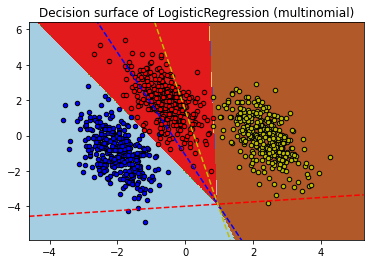

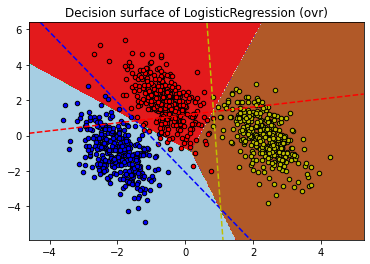

In [2]:
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

In [3]:
from sklearn import datasets, model_selection, linear_model, metrics

# 데이터
n_samples = 100000
xs, ys = datasets.make_classification(
    n_samples=n_samples, # 데이터 수
    n_features=10, # X feature 수
    n_informative=3,
    n_classes=3, # Y class 수
    random_state=rseed) # 난수 발생용 Seed 값
print(f"data shape: xs={xs.shape}, ys={ys.shape}")
train_xs, test_xs, train_ys, test_ys = model_selection.train_test_split(
    xs, ys, test_size=0.3, shuffle=True, random_state=2)
print(f"train shape: train_xs={train_xs.shape}, train_ys={train_ys.shape}")
print(f"test shape: test_xs={test_xs.shape}, test_ys={test_ys.shape}")

# 모델
models = [
    linear_model.LogisticRegression(solver='sag', multi_class='multinomial')
]

for model in models:
    # 학습
    print(f"model={model}")
    model.fit(train_xs, train_ys)

    # 평가
    pred_ys = model.predict(test_xs)

    # 선형 회귀 모델링을 통해 얻은 coefficient, intercept 입니다.
    print(f"coefficient={model.coef_}")
    print(f"intercept={model.intercept_}")
    
    # 평가: 테스트 데이터에 대해서 Accuracy 값을 구합니다.
    acc = metrics.accuracy_score(test_ys, pred_ys)
    print(f"acc={acc:.5f}")
    
    cr = metrics.classification_report(test_ys, pred_ys)
    print(f"classification_report\n{cr}")

data shape: xs=(100000, 10), ys=(100000,)
train shape: train_xs=(70000, 10), train_ys=(70000,)
test shape: test_xs=(30000, 10), test_ys=(30000,)
model=LogisticRegression(multi_class='multinomial', solver='sag')
coefficient=[[-0.006 0.228 -0.357 0.468 -0.001 0.758 0.005 0.297 0.001 -0.008]
 [0.007 -0.222 0.048 0.081 0.005 0.073 0.001 -0.155 0.007 -0.002]
 [-0.001 -0.005 0.310 -0.549 -0.004 -0.831 -0.006 -0.142 -0.008 0.011]]
intercept=[0.070 0.299 -0.369]
acc=0.72010
classification_report
              precision    recall  f1-score   support

           0       0.69      0.81      0.74      9939
           1       0.66      0.58      0.62     10041
           2       0.81      0.77      0.79     10020

    accuracy                           0.72     30000
   macro avg       0.72      0.72      0.72     30000
weighted avg       0.72      0.72      0.72     30000

